In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [2]:
corona_death_dataset_csv = pd.read_csv("covid19_deaths_dataset.csv")
corona_death_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [3]:
corona_death_dataset_csv.shape

(266, 104)

In [4]:
corona_death_dataset_csv.drop(["Lat", "Long"], axis=1, inplace=True)

In [5]:
corona_death_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
corona_death_aggregated = corona_death_dataset_csv.groupby("Country/Region").sum()

In [7]:
corona_death_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [8]:
corona_death_aggregated.shape

(187, 100)

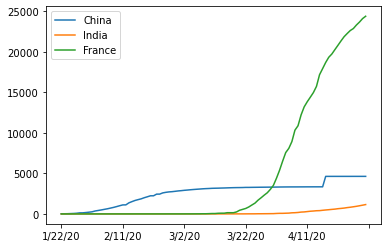

In [11]:
corona_death_aggregated.loc["China"].plot()
corona_death_aggregated.loc["India"].plot()
corona_death_aggregated.loc["France"].plot()
plt.legend()

<AxesSubplot:>

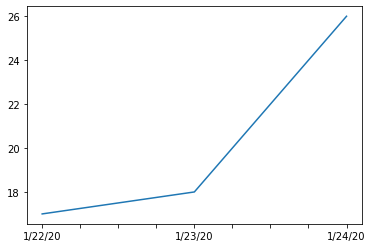

In [12]:
corona_death_aggregated.loc["China"][:3].plot()

<AxesSubplot:>

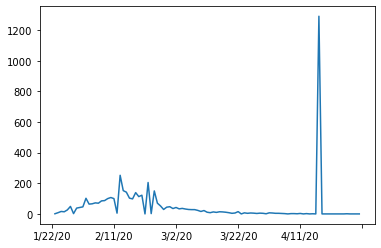

In [14]:
corona_death_aggregated.loc["China"].diff().plot()

In [15]:
corona_death_aggregated.loc["China"].diff().max()

1290.0

In [16]:
corona_death_aggregated.loc["India"].diff().max()

75.0

In [17]:
corona_death_aggregated.loc["France"].diff().max()

1440.0

In [18]:
countries = list(corona_death_aggregated.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(corona_death_aggregated.loc[c].diff().max())
corona_death_aggregated["max_death_rates"] = max_death_rates    

In [19]:
corona_death_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [20]:
corona_data = pd.DataFrame(corona_death_aggregated["max_death_rates"])
corona_data.head()

,max_death_rates
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [21]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [22]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [23]:
happiness_report_csv.drop(["Overall rank", "Score", "Generosity", "Perceptions of corruption"], axis=1, inplace=True)

In [24]:
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [25]:
happiness_report_csv.set_index("Country or region", inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [26]:
corona_data.head()

,max_death_rates
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [28]:
data = corona_data.join(happiness_report_csv,how = "inner")
data.head()

,max_death_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [49]:
data.corr()

,max_death_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rates,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

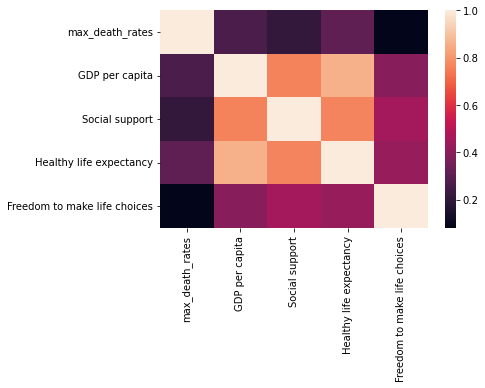

In [30]:
sns.heatmap(data.corr())

In [31]:
data.head()

,max_death_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


C:\Users\subhr\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\subhr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rates'>

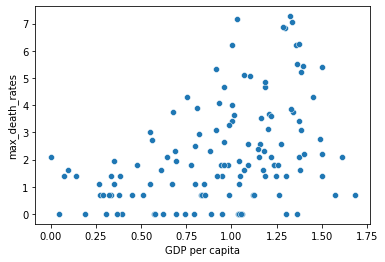

In [34]:
x=data["GDP per capita"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))

C:\Users\subhr\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\subhr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max_death_rates'>

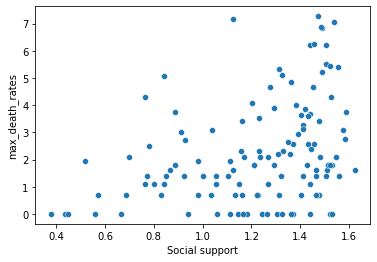

In [39]:
x=data["Social support"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))

C:\Users\subhr\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\subhr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_death_rates'>

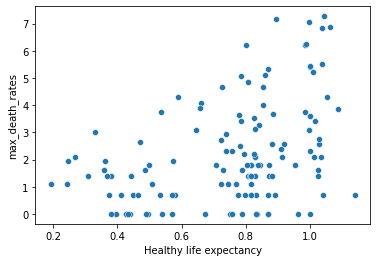

In [42]:
x=data["Healthy life expectancy"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))

C:\Users\subhr\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\subhr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_death_rates'>

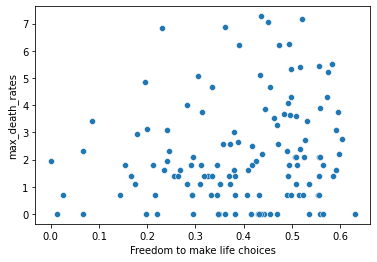

In [44]:
x=data["Freedom to make life choices"]
y=data["max_death_rates"]
sns.scatterplot(x,np.log(y))